In [1]:
#%matplotlib plot
%matplotlib notebook

In [2]:
import os
os.getcwd() 

'/home/vitoria/Documents/Faculdade/TCC/moopt/examples'

In [3]:
import numpy as np
import logging
import sys

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from moopt import nise, monise, nc, pgen, rennen, xnise, random_weights

logging.disable(logging.NOTSET)
logger = logging.getLogger()
logger.setLevel(level=logging.INFO)

In [4]:
def run(d, wscalar_, sscalar_, algorithm='monise'):    
    if algorithm=='monise':
        moo_ = monise(weightedScalar=wscalar_, singleScalar=sscalar_,
                      nodeTimeLimit=2,
                      targetSize=solsize, targetGap=0, nodeGap=0.01, norm=True)
    if algorithm=='nise':
        moo_ = nise(weightedScalar=wscalar_, singleScalar=sscalar_,
                    targetSize=solsize, norm=True, objective='hp')
    elif algorithm=='random':
        moo_ = random_weights(weightedScalar=wscalar_, singleScalar=sscalar_,
                              targetSize=solsize)
    elif algorithm=='pgen':
        moo_ = pgen(weightedScalar=wscalar_, singleScalar=sscalar_,
                targetSize=solsize, norm=True)
    elif algorithm=='xnise':
        moo_ = xnise(weightedScalar=wscalar_, singleScalar=sscalar_,
                 targetSize=solsize, norm=True)
    elif algorithm=='rennen':
        moo_ = rennen(weightedScalar=wscalar_, singleScalar=sscalar_,
                      targetSize=solsize, norm=True)
    
    moo_.optimize()
    objs = np.array([s.objs for s in moo_.solutionsList])
    
    return objs

## Defining the problem

### $\min w^\top(x-d)^2\\s.a. \sum_{i=1}^m x_i = 1\\  x_i\geq0\ \forall i \in \{1,\ldots,m\}$

In [5]:
from xsquared_scalar import xsquared

The class xsquared implement the defined problem following the rules imposed by the interfaces in moopt/scalarization_interfaces.py.

## Example of the problem with two dimensions

In [23]:
m = 2
#d = np.ones(M)
d = np.random.rand(m)+0.001
d = d/d.max()

wscalar_ = sscalar_ = xsquared(d)

solsize = 50
methods = ['nise', 'monise', 'random', 'pgen', 'xnise', 'rennen']

objs2 = {}
for mth in methods:
    objs2[mth] = run(d, wscalar_, sscalar_, algorithm=mth)

<IPython.core.display.Javascript object>


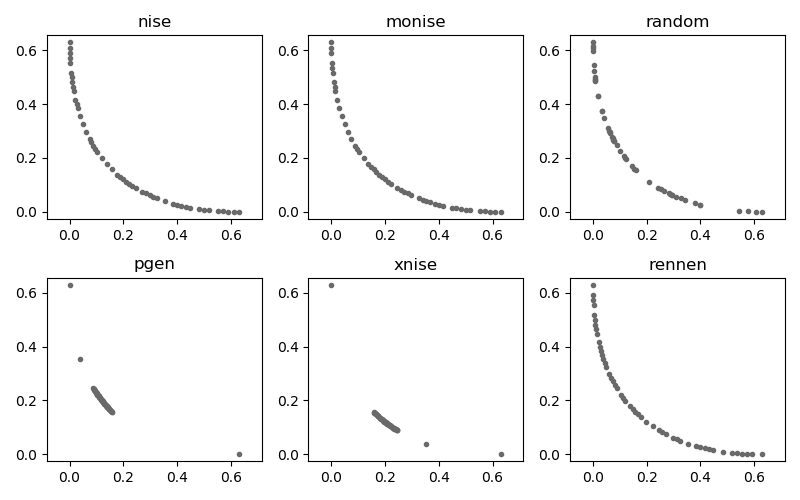

In [24]:
idx = 1
fig = plt.figure(figsize=(8,5))

for mth in methods:
    ax = fig.add_subplot(2,3, idx)
    ax.scatter(objs2[mth][:,0], objs2[mth][:,1], c='dimgrey', marker='.')
    
    plt.title(mth)
    plt.axis('equal')
    
    idx+=1

plt.tight_layout()
plt.show()

## Example of the problem with three dimensions

In [8]:
m = 3
#d = np.ones(M)
d = np.random.rand(m)+0.001
d = d/d.max()

wscalar_ = sscalar_ = xsquared(d)

solsize = 150
methods = ['monise', 'random', 'pgen', 'xnise', 'rennen']

objs3 = {}
for mth in methods:
    objs3[mth] = run(d, wscalar_, sscalar_, algorithm=mth)

<IPython.core.display.Javascript object>


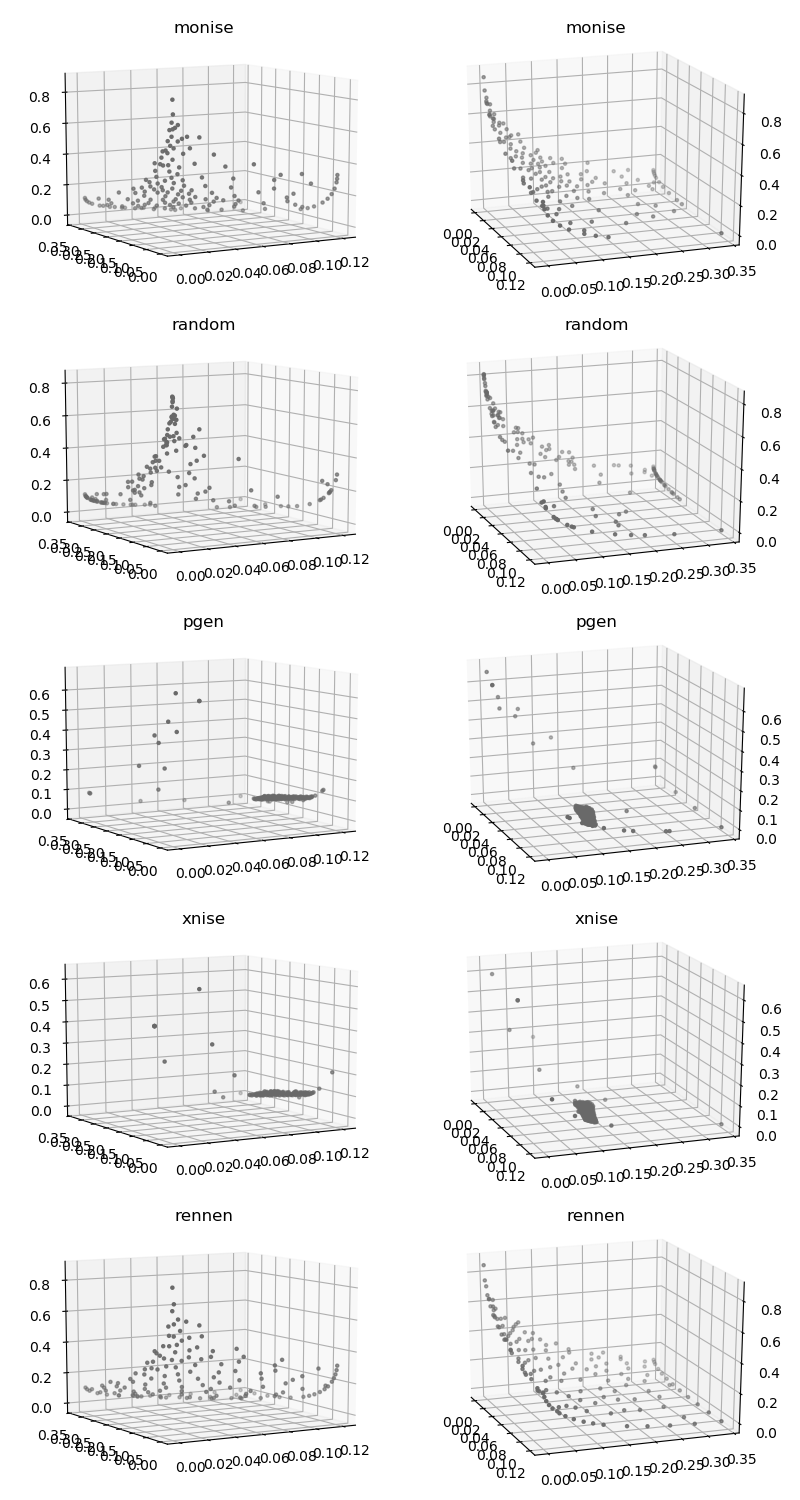

In [9]:
idx = 1
fig = plt.figure(figsize=(8,15))

for mth in methods:
    ax = fig.add_subplot(5,2, 2*idx-1, projection='3d')
    ax.scatter(objs3[mth][:,0], objs3[mth][:,1], objs3[mth][:,2], c='dimgrey', marker='.')
    ax.view_init(10, -120)
    plt.title(mth)
    plt.axis('tight')

    ax = fig.add_subplot(5,2, 2*idx, projection='3d')
    ax.scatter(objs3[mth][:,0], objs3[mth][:,1], objs3[mth][:,2], c='dimgrey', marker='.')
    ax.view_init(20, -20)
    plt.title(mth)
    plt.axis('tight')
    idx+=1


plt.tight_layout()
plt.show()

# Comparação entre MIP e PULP

In [7]:
import time

## Using MIP

In [32]:
m = 2
#d = np.ones(M)
d = np.random.rand(m)+0.001
d = d/d.max()

wscalar_ = sscalar_ = xsquared(d)

solsize = 50

times = []
objs = {}
for i in range(9):
    d = np.random.rand(m)+0.001
    d = d/d.max()

    wscalar_ = sscalar_ = xsquared(d)
    start = time.time()
    objs[i] = run(d, wscalar_, sscalar_, algorithm='monise')
    end = time.time()
    times.append(end-start)
    print(end - start)

28.859678983688354
29.517874479293823
29.52580165863037
29.348419666290283
30.450127363204956
29.261338233947754
28.98584771156311
29.396512746810913
29.81236481666565


<IPython.core.display.Javascript object>


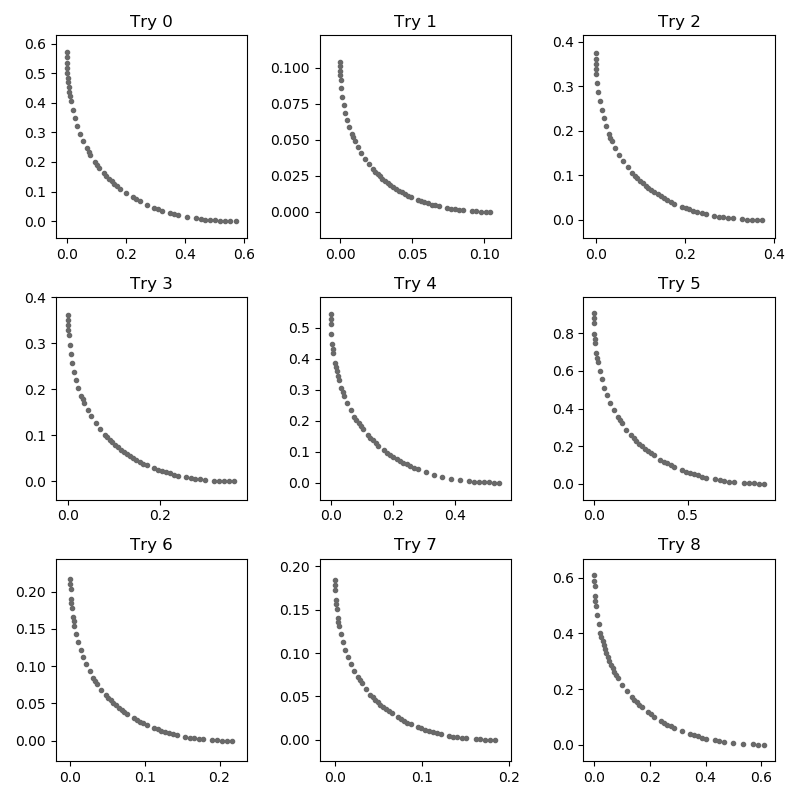

In [33]:
idx = 1
fig = plt.figure(figsize=(8,8))

for i in range(9):
    ax = fig.add_subplot(3,3, idx)
    ax.scatter(objs[i][:,0], objs[i][:,1], c='dimgrey', marker='.')
    
    plt.title("Try "+str(i))
    plt.axis('equal')
    
    idx+=1

plt.tight_layout()
plt.show()

In [34]:
m = 3
#d = np.ones(M)
d = np.random.rand(m)+0.001
d = d/d.max()

wscalar_ = sscalar_ = xsquared(d)

solsize = 150

objs3 = {}
for i in range(10):
    d = np.random.rand(m)+0.001
    d = d/d.max()

    wscalar_ = sscalar_ = xsquared(d)
    start = time.time()
    objs3[i] = run(d, wscalar_, sscalar_, algorithm='monise')
    end = time.time()
    times.append(end-start)

<IPython.core.display.Javascript object>


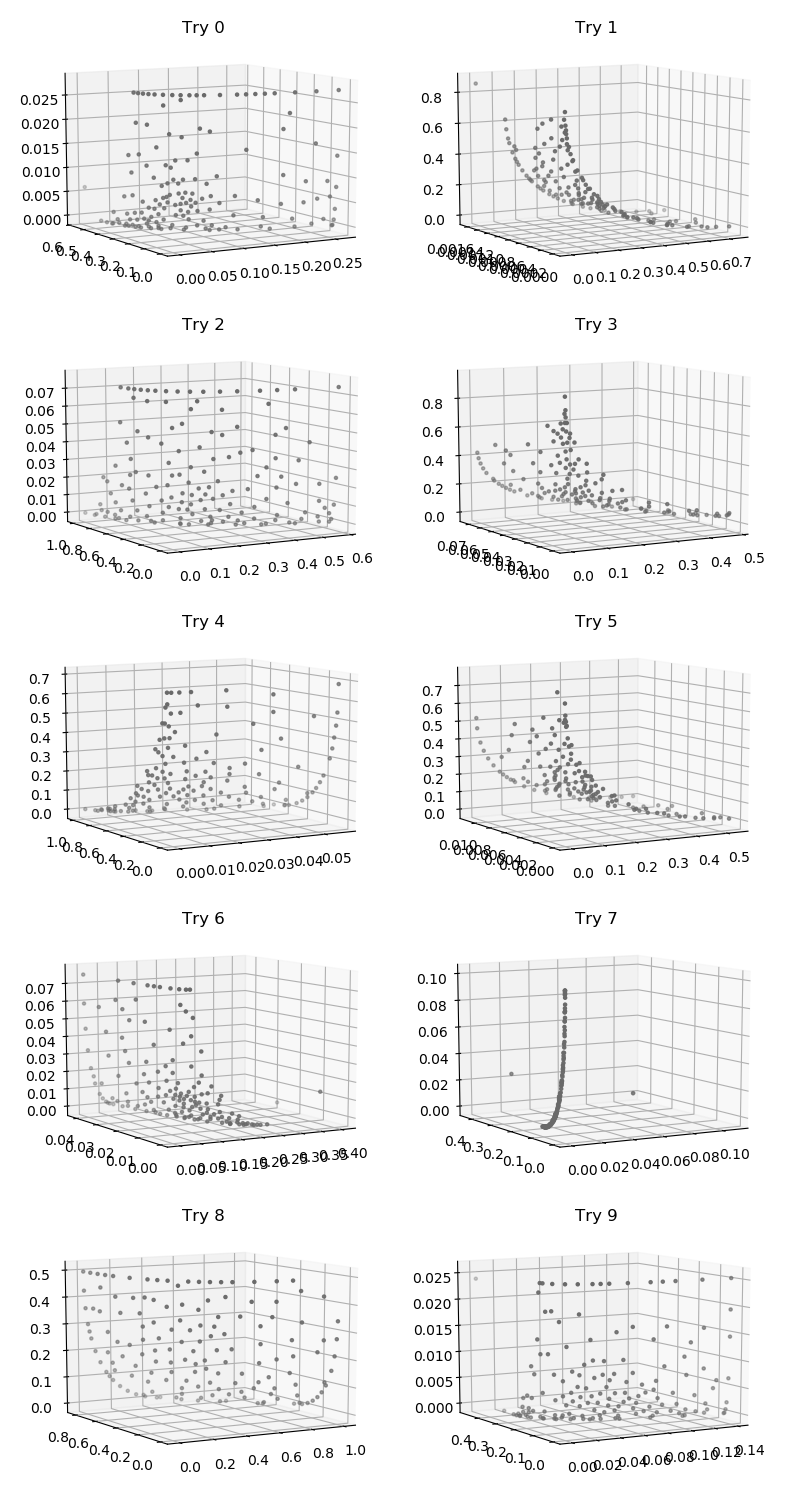

In [35]:
idx = 1
fig = plt.figure(figsize=(8,15))

for i in range(10):
    ax = fig.add_subplot(5,2, idx, projection='3d')
    ax.scatter(objs3[i][:,0], objs3[i][:,1], objs3[i][:,2], c='dimgrey', marker='.')
    ax.view_init(10, -120)
    plt.title("Try "+str(i))
    plt.axis('tight')
    
    idx+=1


plt.tight_layout()
plt.show()

## Using PULP

In [9]:
m = 2
#d = np.ones(M)
d = np.random.rand(m)+0.001
d = d/d.max()

wscalar_ = sscalar_ = xsquared(d)

solsize = 50

times = []
objs = {}
for i in range(9):
    start = time.time()
    objs[i] = run(d, wscalar_, sscalar_, algorithm='monise')
    end = time.time()
    times.append(end-start)
    print(end - start)

25.73337483406067
25.46828007698059
26.42714810371399
25.424657821655273
26.5450599193573
25.47180700302124
26.287939071655273
25.670048475265503
26.1825909614563


<IPython.core.display.Javascript object>


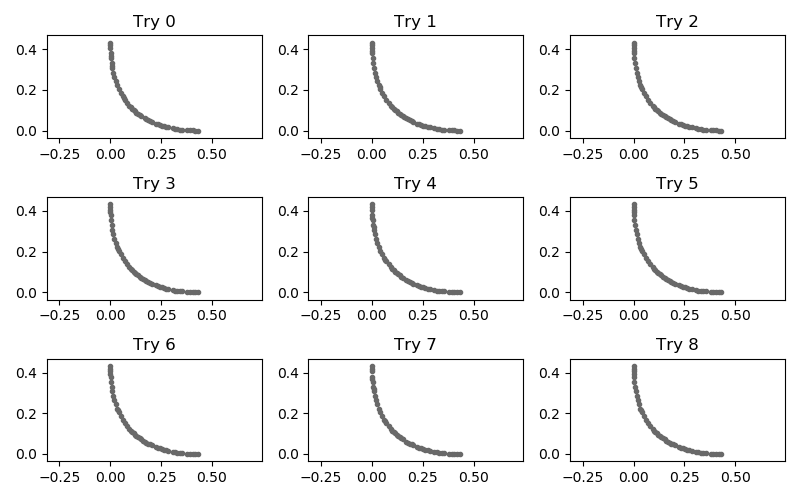

In [10]:
idx = 1
fig = plt.figure(figsize=(8,5))

for i in range(9):
    ax = fig.add_subplot(3,3, idx)
    ax.scatter(objs[i][:,0], objs[i][:,1], c='dimgrey', marker='.')
    
    plt.title("Try "+str(i))
    plt.axis('equal')
    
    idx+=1

plt.tight_layout()
plt.show()

In [11]:
m = 3
#d = np.ones(M)
d = np.random.rand(m)+0.001
d = d/d.max()

wscalar_ = sscalar_ = xsquared(d)

solsize = 150

objs3 = {}
for i in range(10):
    d = np.random.rand(m)+0.001
    d = d/d.max()

    wscalar_ = sscalar_ = xsquared(d)
    start = time.time()
    objs3[i] = run(d, wscalar_, sscalar_, algorithm='monise')
    end = time.time()
    times.append(end-start)
    print(end - start)

248.45760703086853
251.27686595916748
250.77928853034973
253.9696409702301
254.45371890068054
250.0870385169983
253.7828402519226
253.03505682945251
249.92891550064087
256.3353307247162


<IPython.core.display.Javascript object>


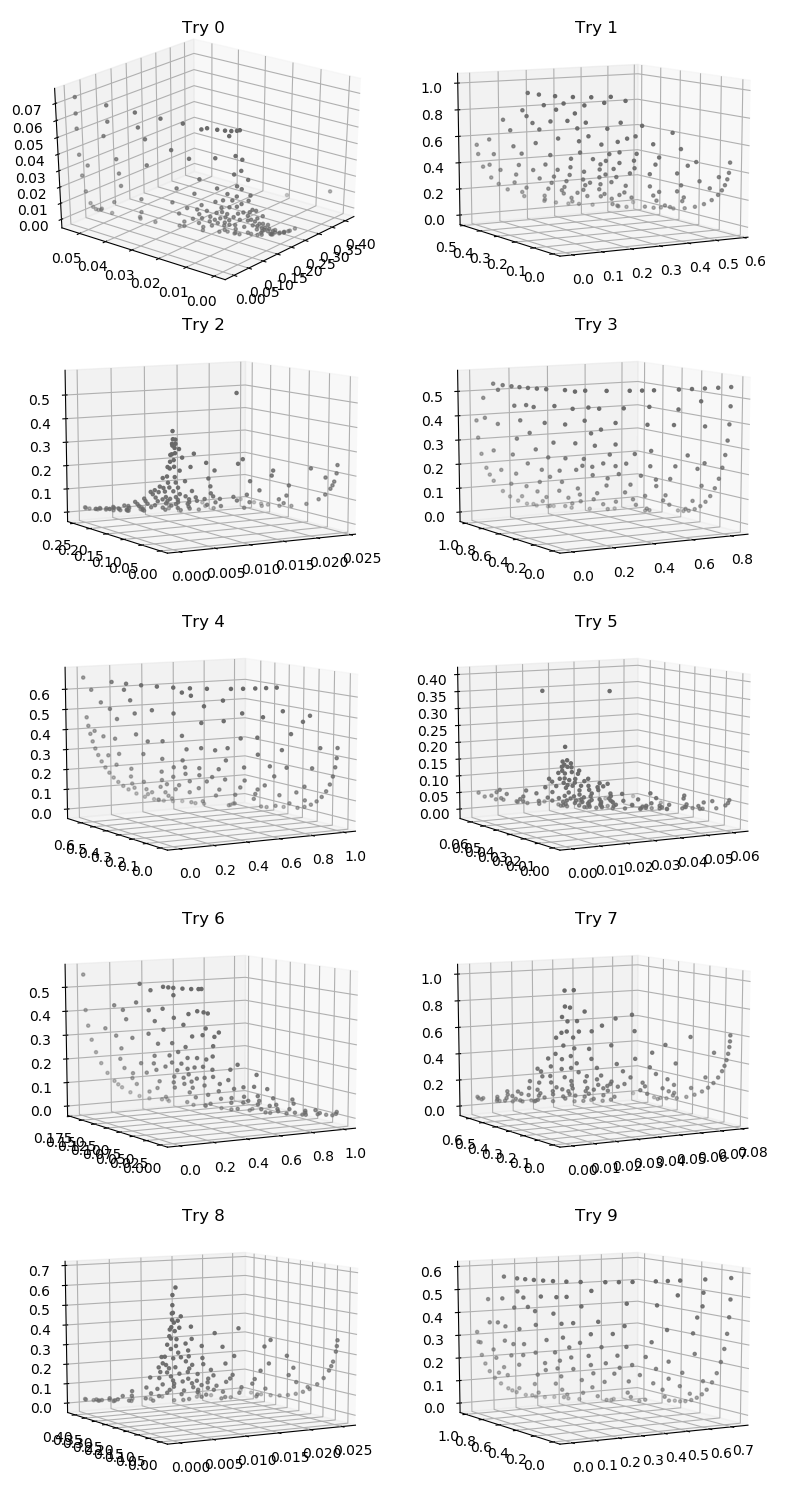

In [12]:
idx = 1
fig = plt.figure(figsize=(8,15))

for i in range(10):
    ax = fig.add_subplot(5,2, idx, projection='3d')
    ax.scatter(objs3[i][:,0], objs3[i][:,1], objs3[i][:,2], c='dimgrey', marker='.')
    ax.view_init(10, -120)
    plt.title("Try "+str(i))
    plt.axis('tight')
    
    idx+=1


plt.tight_layout()
plt.show()